### Logistic Regression for imbalanced dataset

In [20]:
### generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [2]:
## imbalanced dataset
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [5]:
x

array([[ 1.45122049, -1.08670474],
       [ 2.08029047, -0.97808443],
       [ 1.91805213, -1.0431487 ],
       ...,
       [ 0.83675119, -0.54161851],
       [ 0.45782986, -1.05177133],
       [ 0.27891721, -1.16309231]], shape=(1000, 2))

In [6]:
Counter(y)

Counter({np.int64(0): 985, np.int64(1): 15})

In [13]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(x, columns=["feature1", "feature2"])
df["target"] = y

<Axes: xlabel='feature1', ylabel='feature2'>

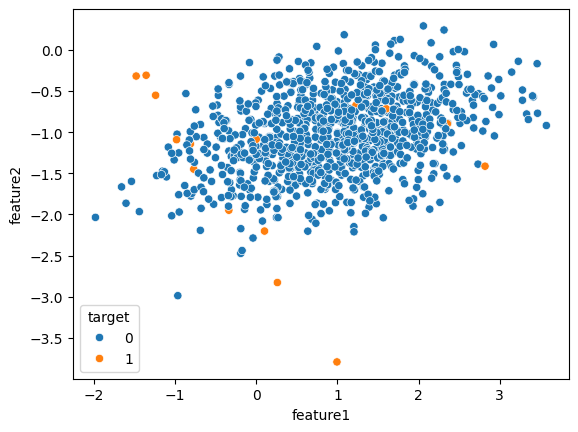

In [14]:
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target")

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
## Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in[1,10,50,100]]

In [18]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [19]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [22]:
grid.fit(x_train,y_train)

d:\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [23]:
grid.best_params_

{'C': 100, 'class_weight': {0: 50, 1: 50}, 'penalty': 'l1', 'solver': 'saga'}

In [24]:
grid.best_score_

np.float64(0.9893333333333333)

In [25]:
y_pred=grid.predict(x_test)

In [26]:
## performance matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.98
[[244   0]
 [  5   1]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       244
           1       1.00      0.17      0.29         6

    accuracy                           0.98       250
   macro avg       0.99      0.58      0.64       250
weighted avg       0.98      0.98      0.97       250

